In [1]:
import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from keras.models import Sequential, model_from_json
from keras.layers import AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Model
# from keras.applications.inception_v3 import InceptionV3
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#from keras.applications.mobilenet import MobileNet
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
#from sklearn.metrics import auc
#import warnings
#warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
imageSize=50
train_dir = r"D:/project/asl-alphabet/asl_alphabet_train/"
test_dir = r"D:/project/asl-alphabet/asl_alphabet_test/"

from tqdm import tqdm
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28           
            else:
                label = 29
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y


In [3]:
z_dir = "D:/I am fine(2)"

In [71]:
def getdata(folder):
    Z = []
    for image_filename in tqdm(os.listdir(folder)):
        img_file = cv2.imread(folder + '/' + image_filename)
        if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file)
                    Z.append(img_arr)
    Z = np.asarray(Z) 
    return Z 

In [72]:
z_test = getdata(z_dir)

100%|███████████████████████████████████████████████████████████████████████████████| 425/425 [00:02<00:00, 196.50it/s]


In [4]:
X_train, y_train = get_data(train_dir) 
#X_test, y_test= get_data(test_dir) # Too few images

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2) 

# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
from keras.utils.np_utils import to_categorical
y_trainHot = to_categorical(y_train, num_classes = 30)
y_testHot = to_categorical(y_test, num_classes = 30)

100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [01:01<00:00, 48.43it/s]


In [5]:
# Shuffle data to permit further subsampling
from sklearn.utils import shuffle
X_train, y_trainHot = shuffle(X_train, y_trainHot, random_state=13)
X_test, y_testHot = shuffle(X_test, y_testHot, random_state=13)
X_train = X_train[:30000]
X_test = X_test[:30000]
y_trainHot = y_trainHot[:30000]
y_testHot = y_testHot[:30000]

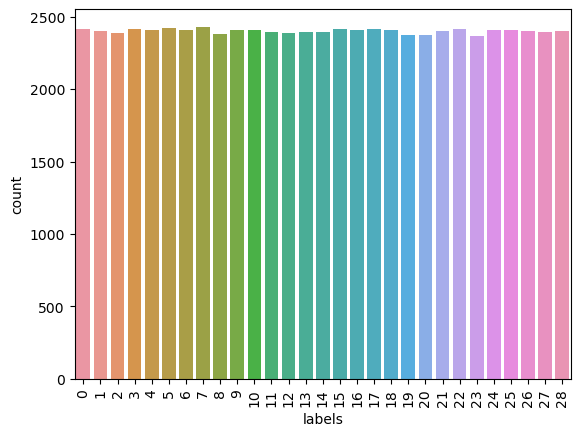

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Define the character map
map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space', 29: 'other'}

# Create a dictionary with the same values as map_characters but with the keys and values reversed
dict_characters = {v:k for k,v in map_characters.items()}

# Create a DataFrame with the labels of the training data
df = pd.DataFrame()
df["labels"] = y_train

# Plot the count of each label in the training data
sns.countplot(x="labels", data=df)
plt.xticks(rotation=90) # Rotate the x-axis labels for better readability
plt.show()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 25, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 25, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 25, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

D:\New folder\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
938/938 [==============================] - 523s 554ms/step - loss: 2.2304 - accuracy: 0.5023 - val_loss: 1.6260 - val_accuracy: 0.6741
Epoch 2/10
938/938 [==============================] - 514s 549ms/step - loss: 1.3597 - accuracy: 0.7301 - val_loss: 1.1842 - val_accuracy: 0.7646
Epoch 3/10
938/938 [==============================] - 483s 515ms/step - loss: 1.0441 - accuracy: 0.7907 - val_loss: 0.9612 - val_accuracy: 0.8064
Epoch 4/10
938/938 [==============================] - 544s 580ms/step - loss: 0.8646 - accuracy: 0.8266 - val_loss: 0.8230 - val_accuracy: 0.8297
Epoch 5/10
938/938 [==============================] - 562s 599ms/step - loss: 0.7432 - accuracy: 0.8508 - val_loss: 0.7131 - val_accuracy: 0.8567
Epoch 6/10
938/938 [==============================] - 547s 584ms/step - loss: 0.6549 - accuracy: 0.8690 - val_loss: 0.6393 - val_accuracy: 0.8692
Epoch 7/10
938/938 [==============================] - 486s 519ms/step - loss: 0.5864 - accuracy: 0.8820 - val_loss: 0.5773 -

D:\New folder\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\New folder\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\New folder\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\New folder\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

              precision    recall  f1-score   support

           A       0.89      0.92      0.91       589
           B       0.88      0.95      0.91       602
           C       0.99      0.98      0.98       611
           D       0.98      0.98      0.98       584
           E       0.94      0.84      0.89       595
           F       0.98      0.94      0.96       582
           G       0.99      0.93      0.96       594
           H       0.96      0.99      0.97       572
           I       0.89      0.93      0.91       621
           J       0.94      0.95      0.95       595
           K       0.89      0.88      0.88       590
           L       0.96      1.00      0.98       608
           M       0.83      0.89      0.86       615
           N       0.95      0.85      0.90       607
           O       0.97      0.94      0.96       605
           P       0.92      0.97      0.95       589
           Q       0.99      0.96      0.97       593
           R       0.77    

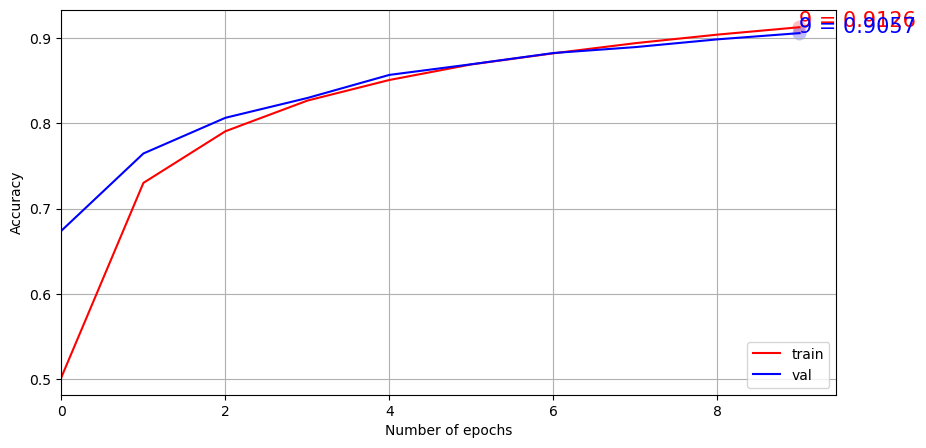

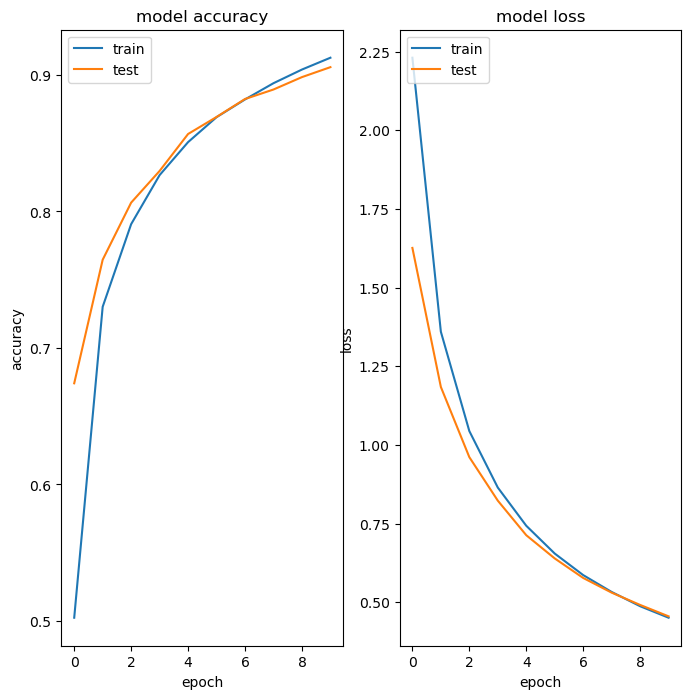

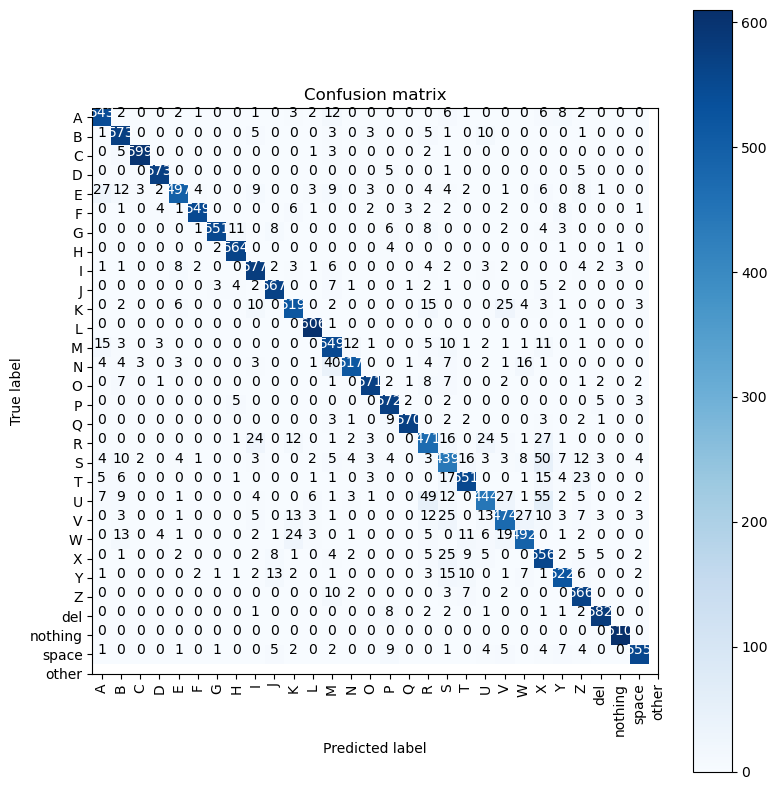

In [7]:
# Helper Functions  Learning Curves and Confusion Matrix
import matplotlib.pyplot as plt
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

class MetricsCheckpoint(Callback):
    """Callback that saves metrics after each epoch"""
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save('logs.npy', metrics, allow_pickle=False)

def plotKerasLearningCurve():
    plt.figure(figsize=(10,5))
    metrics = np.load('logs.npy', allow_pickle=True)[()]
    filt = ['acc'] # try to add 'loss' to see the loss learning curve
    for k in filter(lambda x : np.any([kk in x for kk in filt]), metrics.keys()):
        l = np.array(metrics[k])
        plt.plot(l, c= 'r' if 'val' not in k else 'b', label='val' if 'val' in k else 'train')
        x = np.argmin(l) if 'loss' in k else np.argmax(l)
        y = l[x]
        plt.scatter(x,y, lw=0, alpha=0.25, s=100, c='r' if 'val' not in k else 'b')
        plt.text(x, y, '{} = {:.4f}'.format(x,y), size='15', color= 'r' if 'val' not in k else 'b')   
    plt.legend(loc=4)
    plt.axis([0, None, None, None]);
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.ylabel('Accuracy')

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_learning_curve(history):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

map_characters1 = map_characters
class_weight1 = class_weight.compute_class_weight(class_weight='balanced',classes= np.unique(y_train), y =y_train)
weight_path1 = 'D:/project/keras-pretrained-models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
weight_path2 = 'D:/project/keras-pretrained-models/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pretrained_model_1 = VGG16(weights = weight_path1, include_top=False, input_shape=(imageSize, imageSize, 3))
#pretrained_model_2 = InceptionV3(weights = weight_path2, include_top=False, input_shape=(imageSize, imageSize, 3))

optimizer1 = keras.optimizers.Adam()
optimizer2 = keras.optimizers.RMSprop(lr=0.0001)
class MetricsCheckpoint(keras.callbacks.Callback):
    """Callback that saves metrics after each epoch"""

    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}

    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)

def pretrainedNetwork(xtrain,ytrain,xtest,ytest,pretrainedmodel,pretrainedweights,classweight,numclasses,numepochs,optimizer,labels):

    base_model = pretrained_model_1 # Topless
    # Add top layer
    x = base_model.output
    x = Flatten()(x)
    predictions = Dense(numclasses, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    # Train top layer
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, verbose=1)]

    model.summary()
    class_weight_dict = {}
    for i, weight in enumerate(classweight):
        class_weight_dict[i] = weight
    # Fit model
    history = model.fit(xtrain, ytrain, epochs=numepochs, class_weight=class_weight_dict, validation_data=(xtest, ytest), verbose=1, callbacks=[MetricsCheckpoint('logs')])
    # Evaluate model
    score = model.evaluate(xtest,ytest, verbose=0)
    print('\nKeras CNN - accuracy:', score[1], '\n')
    y_pred = model.predict(xtest)
    print(sklearn.metrics.classification_report(np.argmax(ytest, axis=1), np.argmax(y_pred, axis=1), labels=list(range(numclasses)), target_names=list(labels.values())))
    Y_pred_classes = np.argmax(y_pred,axis = 1) 
    Y_true = np.argmax(ytest,axis = 1) 
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    plotKerasLearningCurve()
    plt.show()
    plot_learning_curve(history)
    plt.show()
    plot_confusion_matrix(confusion_mtx, classes = list(labels.values()))
    plt.show()
    return model

d = pretrainedNetwork(X_train, y_trainHot, X_test, y_testHot,pretrained_model_1,weight_path1,class_weight1,30,10,optimizer1,map_characters1)
d

In [10]:

# def pretrained_Network(xtrain,ytrain,z_test,ytest,pretrainedmodel,pretrainedweights,classweight,numclasses,numepochs,optimizer,labels):

#     base_model = pretrained_model_1 # Topless
#     # Add top layer
#     x = base_model.output
#     x = Flatten()(x)
#     predictions = Dense(numclasses, activation='softmax')(x)
#     model = Model(inputs=base_model.input, outputs=predictions)

#     # Train top layer
#     for layer in base_model.layers:
#         layer.trainable = False
#     model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#     callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, verbose=1)]

# #     model.summary()
#     class_weight_dict = {}
#     for i, weight in enumerate(classweight):
#         class_weight_dict[i] = weight
#     # Fit model
#     history = model.fit(xtrain, ytrain, epochs=numepochs, class_weight=class_weight_dict, validation_data=(xtest, ytest), verbose=1, callbacks=[MetricsCheckpoint('logs')])
#     # Evaluate model
#     score = model.evaluate(xtest,ytest, verbose=0)
#     print('\nKeras CNN - accuracy:', score[1], '\n')
#     y_pred = model.predict(xtest)
#     print(sklearn.metrics.classification_report(np.argmax(ytest, axis=1), np.argmax(y_pred, axis=1), labels=list(range(numclasses)), target_names=list(labels.values())))
#     Y_pred_classes = np.argmax(y_pred,axis = 1) 
#     Y_true = np.argmax(ytest,axis = 1) 
#     confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
#     plotKerasLearningCurve()
#     plt.show()
#     plot_learning_curve(history)
#     plt.show()
#     plot_confusion_matrix(confusion_mtx, classes = list(labels.values()))
#     plt.show()
#     return model

# pretrainedNetwork(X_train, y_trainHot, X_test, y_testHot,pretrained_model_1,weight_path1,class_weight1,30,10,optimizer1,map_characters1)

In [73]:
z_pred = d.predict(z_test)
z_pred_classes = np.argmax(z_pred, axis = 1)
z_pred_classes


14/14 [==============================] - 5s 335ms/step


array([ 8,  8,  8, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,  8, 27, 27, 27,
       28, 28, 28, 28, 28, 28, 28,  8, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28,  8, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27,  8, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27,  8, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0, 27, 27,
       27, 27, 27, 27, 27,  8, 27, 27, 27, 27, 27, 27, 27, 27, 12, 12,  8,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  8,  8, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12,  8, 12, 27, 27, 27, 27, 27, 27, 27, 27, 27,  8,
       27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 27, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 27, 28, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,  5,  5,  5,  5,
        5,  5,  5, 27,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 27,  5,  5,
        5,  5,  5,  5, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27,  8, 27, 27

In [74]:
l = len(z_pred_classes)
l

425

In [75]:
z_pred_classes = list(z_pred_classes)
smaller_arrays = [z_pred_classes[i:i+5] for i in range(0, l, 10)]

# create a dictionary to count the occurrences of each element within each smaller array
arr = []
count_dict = {}
for smaller_arr in smaller_arrays:
    for num in smaller_arr:
        if num in count_dict:
            count_dict[num] += 1
        else:
            count_dict[num] = 1

# identify which elements have only one occurrence across all the smaller arrays
    unique_elements = []
    for key, value in count_dict.items():
        if value == 1 or value == 2:
            unique_elements.append(key)
    count_dict = {}
    for x in smaller_arr:
        if x not in unique_elements:
            arr.append(x)
# remove any element that appears in the list of unique elements
# arr = [x for x in z_pred_classes if x not in unique_elements]
# smaller_arrays
arr

[8,
 8,
 8,
 27,
 27,
 27,
 27,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 27,
 27,
 27,
 27,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 27,
 27,
 27,
 27,
 27,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 28,
 28,
 28,
 28,
 27,
 27,
 27,
 27,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [44]:
# z_pred_classes = list(z_pred_classes)
# unique_elements = set(z_pred_classes)

# # Remove the unique elements from the list
# for element in unique_elements:
#     while element in z_pred_classes:
#         z_pred_classes.remove(element)
# z_pred_classes

[]

In [76]:
lg = len(arr)
lst = []
for i in range(0,lg):
    if(arr[i] != 27):
        lst.append(arr[i])
    elif(lst != []):
        max_element = max(lst, key=lambda x: lst.count(x))
        
        if(lst.count(max_element) > 2):
            if(max_element == 26):
                os.chdir("D:/")
                with open('my_file.txt', 'r+') as f:
                    f.seek(0, os.SEEK_END)
                    pos = f.tell()
                    f.seek(pos - 1, os.SEEK_SET)
                    f.truncate()
            else:
                os.chdir("D:/")
                with open('my_file.txt', 'a') as f:
                    if max_element == 0:
                        f.write('A')
                        lst = []
                    elif max_element == 1:
                        f.write('B')
                        lst = []
                    elif max_element == 2:
                        f.write('C')
                        lst = []
                    elif max_element == 3:
                        f.write('D')
                        lst = []
                    elif max_element == 4:
                        f.write('E')
                        lst = []
                    elif max_element == 5:
                        f.write('F')
                        lst = []
                    elif max_element == 6:
                        f.write('G')
                        lst = []
                    elif max_element == 7:
                        f.write('H')
                        lst = []
                    elif max_element == 8:
                        f.write('I')
                        lst = []
                    elif max_element == 9:
                        f.write('J')
                        lst = []
                    elif max_element == 10:
                        f.write('K')
                        lst = []
                    elif max_element == 11:
                        f.write('L')
                        lst = []
                    elif max_element == 12:
                        f.write('M')
                        lst = []
                    elif max_element == 13:
                        f.write('N')
                        lst = []
                    elif max_element == 14:
                        f.write('O')
                        lst = []
                    elif max_element == 15:
                        f.write('P')
                        lst = []
                    elif max_element == 16:
                        f.write('Q')
                        lst = []
                    elif max_element == 17:
                        f.write('R')
                        lst = []
                    elif max_element == 18:
                        f.write('S')
                        lst = []
                    elif max_element == 19:
                        f.write('T')
                        lst = []
                    elif max_element == 20:
                        f.write('U')
                        lst = []
                    elif max_element == 21:
                        f.write('V')
                        lst = []
                    elif max_element == 22:
                        f.write('W')
                        lst = []
                    elif max_element == 23:
                        f.write('X')
                        lst = []
                    elif max_element == 24:
                        f.write('Y')
                        lst = []
                    elif max_element == 25:
                        f.write('Z')
                        lst = []
                    elif max_element == 28:
                        f.write(' ')
                        lst = []
                    else:
                        f.write('')
                        lst = []
        else:
            continue
                
                
        

In [27]:
dict_characters

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28,
 'other': 29}